# Summary of Ride Sharing Data
## Trends
* Trend 1
* Trend 2
* Trend 3

In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Files to load
city_file = "data/city_data.csv"
ride_file = "data/ride_data.csv"

# Read city and ride data files
city_data = pd.read_csv(city_file)
ride_data = pd.read_csv(ride_file)

# Combine the data into a single dataset
all_data = pd.merge(ride_data, city_data, on='city')

# Display the data table for preview
all_data.sample(7)

,city,date,fare,ride_id,driver_count,type
948,South Evanton,2018-04-08 01:01:44,5.62,1336030545631,11,Urban
255,New Kimberlyborough,2018-02-07 01:10:11,9.34,7992781920789,33,Urban
171,Simpsonburgh,2018-04-12 19:38:44,22.45,7811391600020,21,Urban
1319,Liumouth,2018-03-22 20:35:56,39.96,6162501769368,69,Urban
1086,West Christopherberg,2018-03-18 17:14:06,12.64,1061090771392,32,Urban
869,Martinezhaven,2018-04-13 19:46:33,40.20,8856596685853,25,Urban
2179,West Kimmouth,2018-01-04 10:24:04,20.69,1687206700447,4,Suburban


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

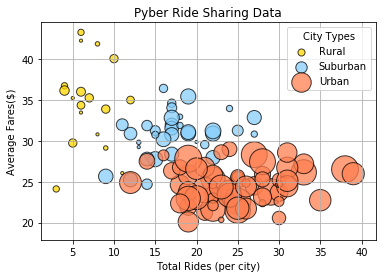

In [22]:
# Create reduced dataframe with index set to city type
data_bubble = all_data.set_index('type')


# Obtain the x (rides per city) coordinates for each of the three city types

rides_rur = data_bubble.loc['Rural',['city','ride_id']]
rides_rur_grp = rides_rur.groupby('city').count()
rides_rur_grp = rides_rur_grp.rename(columns = {'ride_id':'Ride Count'})
# rides_rur_grp

rides_sub = data_bubble.loc['Suburban',['city','ride_id']]
rides_sub_grp = rides_sub.groupby('city').count()
rides_sub_grp = rides_sub_grp.rename(columns = {'ride_id':'Ride Count'})
# rides_sub_grp

rides_urb = data_bubble.loc['Urban',['city','ride_id']]
rides_urb_grp = rides_urb.groupby('city').count()
rides_urb_grp = rides_urb_grp.rename(columns = {'ride_id':'Ride Count'})
# rides_urb_grp

# Obtain the y (average fare per city) coordinates for each of the three city types

fare_rur = data_bubble.loc['Rural',['city','fare']]
fare_rur_grp = fare_rur.groupby('city').mean()
# fare_rur_grp

fare_sub = data_bubble.loc['Suburban',['city','fare']]
fare_sub_grp = fare_sub.groupby('city').mean()
# fare_sub_grp

fare_urb = data_bubble.loc['Urban',['city','fare']]
fare_urb_grp = fare_urb.groupby('city').mean()
# fare_urb_grp

# Set up driver count
drv_count = city_data[['type','city','driver_count']]
drv_count = drv_count.set_index('type')

drv_count_rur = drv_count.loc['Rural',['city','driver_count']]

drv_count_sub = drv_count.loc['Suburban',['city','driver_count']]

drv_count_urb = drv_count.loc['Urban',['city','driver_count']]                              


# Build scatter plot for Rural Cities
plt.scatter(rides_rur_grp, 
            fare_rur_grp, 
            s = 10*drv_count_rur['driver_count'], 
            marker = 'o',
            c = 'gold',
            edgecolors = 'black',
            alpha = 0.75,
            label = 'Rural'
           )

# Build scatter plot for Suburban Cities
plt.scatter(rides_sub_grp, 
            fare_sub_grp, 
            s = 10*drv_count_sub['driver_count'], 
            marker = 'o',
            c = 'lightskyblue',
            edgecolors = 'black',
            alpha = 0.75,
            label = 'Suburban'
           )

# Build scatter plot for Urban Cities
plt.scatter(rides_urb_grp, 
            fare_urb_grp, 
            s = 10*drv_count_urb['driver_count'], 
            marker = 'o',
            c = 'coral',
            edgecolors = 'black',
            alpha = 0.75,
            label = 'Urban'
           )


# Incorporate the other graph properties
plt.grid(True)
plt.legend(loc = 'upper right', title = "City Types")
plt.title("Pyber Ride Sharing Data")
plt.xlabel("Total Rides (per city)")
plt.ylabel("Average Fares($)")

# Incorporate a text label regarding circle size


plt.show()

# # Save Figure
# plt.savefig("Images/Bubble_RideSharingData.png")

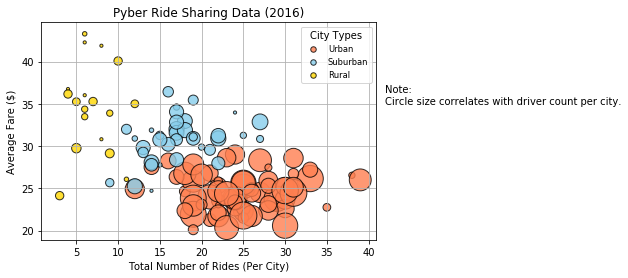

## Total Fares by City Type

In [ ]:
# Calculate fares for each city type
fares_data = all_data[['type','fare']].set_index('type')
fares_grp = fares_data.groupby('type').sum()
fare_sums = pd.Series(fares_grp['fare'])

# Build Pie Chart variables to be used on all 3 charts
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0,0,0.1)

# Build Pie Chart for fares
plt.pie(fare_sums, explode=explode, labels=labels, colors=colors, autopct="%.1f%%", radius=1.2,
        shadow=True, startangle = 140)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("Images/Pie_FaresbyCityType.png")

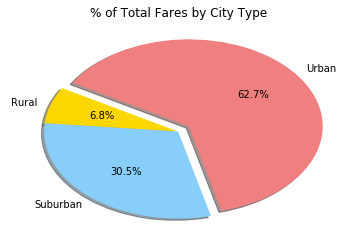

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

In [ ]:
# Calculate rides per city type
rides_data = all_data[['type','ride_id']].set_index('type')
rides_grp = rides_data.groupby('type').count()
ride_counts = pd.Series(rides_grp['ride_id'])
ride_counts

# Build Pie Chart (note explode and label values already defined in first pie chart cell)
plt.pie(ride_counts, 
        explode=explode, 
        labels=labels, 
        colors=colors, 
        autopct="%.1f%%", 
        radius=1.2,
        shadow=True, 
        startangle = 150
       )

plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("Images/Pie_RidesbyCityType.png")

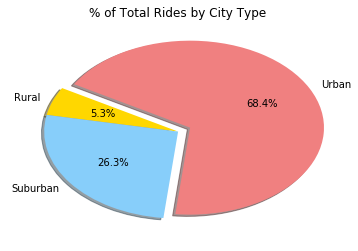

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [ ]:
# Calculate total drivers by type
driver_data = city_data[['type','driver_count']].set_index('type')
driver_grp = driver_data.groupby('type').sum()
driver_sums = pd.Series(driver_grp['driver_count'])


# Build Pie Chart (note explode and label values already defined in first pie chart cell)
plt.pie(driver_sums, explode=explode, labels=labels, colors=colors, autopct="%.1f%%", radius=1.2,
        shadow=True, startangle = 170)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("Images/Pie_DriversbyCityType.png")

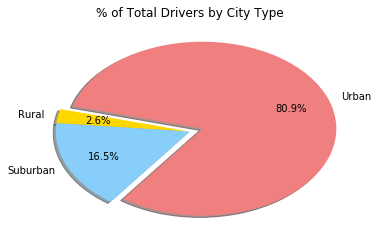

In [6]:
# Show Figure
plt.show()